#COVID
<font color='orange'>**If you attended the class in person, please don't forget to fill in [this form](https://docs.google.com/forms/d/e/1FAIpQLSfA7p1lxOhaXLw_2jO1OBvOzqheS0kjzm968S4uciXQKh5__g/viewform)**

# Ensemble learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #5

This colaboratory also contains **Homework #5** of the Machine Learning course, which is due **Nov 15, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:
* Please, submit only .ipynb that you extract from the colaboratory!
* Links to your colaboratory will not be accepted as a solution!
* Run your colab before submitting (no output - no grades).
* Do not change the description of tasks (even if there is a typo|mistake|etc).
* Remove unnecessary long prints after debugging.
* Each task should be solved right under the question of the task and not elsewhere.
* Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install plotnine
from plotnine import *

# Basic ensemble via averaging (in the case of regression)


As in the lecture we shall start with the most basic form of ensemble learning - combining predictions from different models into one. Here we will look into combining linear regression algorithms (vanila, ridge and lasso). In practice you can use almost any regression model as part of such ensemble. Needless to say that combining predictions produced by the same model on the same data won't lead you anywhere.

In [ ]:
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})

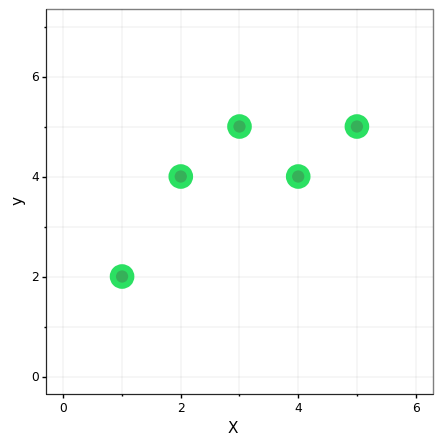

<ggplot: (8768214911282)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Let's split this magnificently large dataset further to make `training` and `test` sets

In [ ]:
example_data

x  y
0  1  2
1  2  4
2  3  5
3  4  4
4  5  5

In [ ]:
train_df = example_data.iloc[[0,2,3],:] # select 1st, 3rd and 4th samples into the training set
print(train_df)

test_df = example_data.iloc[[1,4],:] # select 2nd and 5th samples into the test set
print(test_df)

   x  y
0  1  2
2  3  5
3  4  4
   x  y
1  2  4
4  5  5


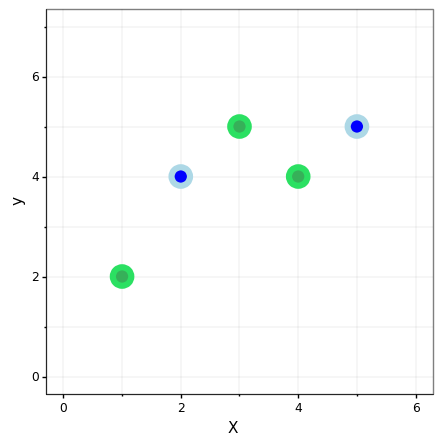

<ggplot: (-9223363268640916792)>

In [ ]:
fig = (
    ggplot(data = train_df,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig = fig + geom_point(data = test_df,
          mapping = aes(x = 'x', y = 'y'), fill = 'blue', 
               size = 5.0,
               stroke = 2.5,
               colour = 'lightblue',
               shape = 'o')
fig

Now that data is ready let's train three linear regression models: basic linear regression, ridge regression and lasso regression. Here is a code from the previous practice session:

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Initialising all three regression models
lr = LinearRegression()

lambda_ = 1

# Ridge regression (template)
lr_ridge = Ridge(lambda_)

# Lasso 
lr_lasso = Lasso(lambda_)

We fit all three models on our improvised training data (`train_df`)

In [ ]:
lr.fit(train_df[['x']], train_df[['y']])
lr_ridge.fit(train_df[['x']], train_df[['y']])
lr_lasso.fit(train_df[['x']], train_df[['y']])

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Visualise all three lines on one plot:

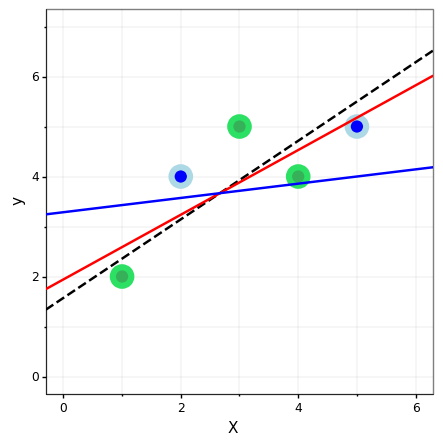

<ggplot: (-9223363268640938573)>

In [ ]:
fig = fig + geom_abline(intercept = lr.intercept_, slope = lr.coef_[0], linetype="dashed", size=1)
fig = fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1)
fig = fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1)
fig

What can you say about this plot? How well each model performs? On train? On test?

Next, we shall evaluate model predictions on the test set, but first we need to generate these predictions:

In [ ]:
# predicting test set by each of the models
lr_pred = lr.predict(test_df[['x']])
lr_ridge_pred = lr_ridge.predict(test_df[['x']])
lr_lasso_pred = lr_lasso.predict(test_df[['x']]).reshape((2,1)) # we need to reshape the resulting vector

We will again use **residual sum of squares** (**RSS**) as a performance metric:

In [ ]:
def rss(predicted, true): # RSS == Residual Sum of Squares
  return(np.sum((true - predicted)**2))

In [ ]:
# compute RSS by each model on test set using rss function
lr_rss = rss(lr_pred, test_df[['y']])
lr_ridge_rss = rss(lr_ridge_pred, test_df[['y']])
lr_lasso_rss = rss(lr_lasso_pred, test_df[['y']])

print(f'RSS for Linear Regression: {np.array(lr_rss)[0]}')
print(f'RSS for Ridge Regression: {np.array(lr_ridge_rss)[0]}')
print(f'RSS for Lasso Regression: {np.array(lr_lasso_rss)[0]}')

RSS for Linear Regression: 0.9846938775510198
RSS for Ridge Regression: 0.6159169550173008
RSS for Lasso Regression: 1.1836734693877553


These are performances of individual models. 

Next, let's combine predictions of three regression models on test set into ensemble by averaging:

In [ ]:
np.array((lr_pred, lr_ridge_pred, lr_lasso_pred)).reshape((3,2))

array([[3.14285714, 5.5       ],
       [3.23529412, 5.17647059],
       [3.57142857, 4.        ]])

In [ ]:
ensemble_preds = np.mean([lr_pred, lr_ridge_pred, lr_lasso_pred], axis = 0)
print(ensemble_preds)

[[3.31652661]
 [4.89215686]]


What about RSS of averaged ensemble?

In [ ]:
ensemble_rss = rss(ensemble_preds, test_df[['y']])
print(np.array(ensemble_rss))

[0.47876602]


How do we visualise resulting model?

In [ ]:
background_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61)})
background_data

x
0   0.0
1   0.1
2   0.2
3   0.3
4   0.4
..  ...
56  5.6
57  5.7
58  5.8
59  5.9
60  6.0

[61 rows x 1 columns]

In [ ]:
background_data['lr'] = lr.predict(background_data[['x']])
background_data['lr_ridge'] = lr_ridge.predict(background_data[['x']])
background_data['lr_lasso'] = lr_lasso.predict(background_data[['x']])
background_data['ensemble'] = background_data[['lr', 'lr_ridge', 'lr_lasso']].mean(axis = 1)
background_data.head()

x        lr  lr_ridge  lr_lasso  ensemble
0  0.0  1.571429  1.941176  3.285714  2.266106
1  0.1  1.650000  2.005882  3.300000  2.318627
2  0.2  1.728571  2.070588  3.314286  2.371148
3  0.3  1.807143  2.135294  3.328571  2.423669
4  0.4  1.885714  2.200000  3.342857  2.476190

Let's make our ensemble orange (mature colour)

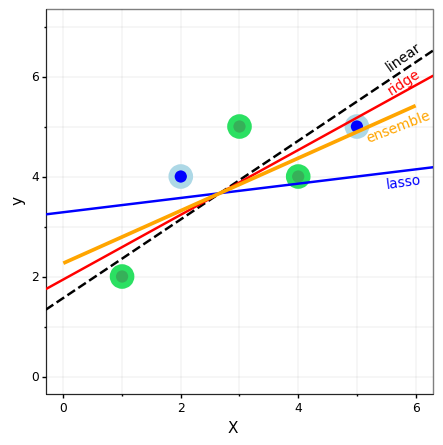

<ggplot: (-9223363268643646320)>

In [ ]:
fig = (
  fig + geom_path(data = background_data, mapping = aes(x = 'x', y = 'ensemble'), size = 1.5, colour = 'orange') + 
  # each line like this adds a label into a specific position with a specific colour
  annotate("text", label = "linear", x = 5.8, y = 6.4, size = 10, colour = "black", angle = 35) + 
  annotate("text", label = "ridge", x = 5.8, y = 5.9, size = 10, colour = "red", angle = 33) + 
  annotate("text", label = "lasso", x = 5.8, y = 3.9, size = 10, colour = "blue", angle = 8) +  
  annotate("text", label = "ensemble", x = 5.7, y = 5.0, size = 10, colour = "orange", angle = 21)
) 
fig

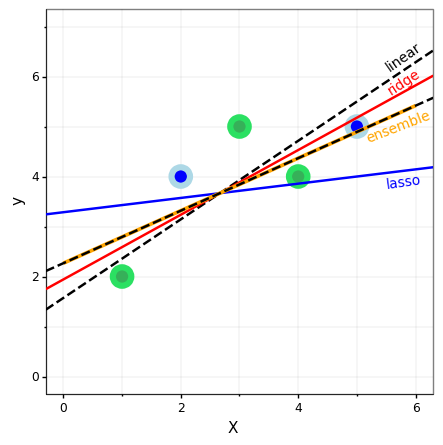

<ggplot: (-9223363268639866550)>

In [ ]:
fig + geom_abline(intercept = np.mean((lr_lasso.intercept_, lr_ridge.intercept_, lr.intercept_)), slope = np.mean((lr_lasso.coef_[0], lr_ridge.coef_[0], lr.coef_[0])), linetype="dashed", size=1)

Here we created a simple ensemble using three linear regression models via averaging. It is a nice example how you can create a stronger model by leveraging various models' strengths. 

# Basic ensemble via majority vote (in case of classification)
In classification majority vote is used when predictions of different models are merged into an ensemble. But first we shall generate some synthetic data.

In [ ]:
def create_random_2c_data (D, N):
  """
  Function create_random_2c_data generates two sets of D dimensional 
  points (N points each), one for each class. The first set is sampled from D 
  dimensional Gaussian distribution with mean 0 and standard deviation 1. The 
  second set is generated from the distribution, with mean 1 and standard 
  deviation 1.
  """
  # Generating N points for the first class
  mu_vec1 = np.zeros(D) # creates a vector of zeros, these are averages across each dimension
  cov_mat1 = np.eye(D) # creates a diagonal matrix of size D x D, all values except diagonal are 0
  class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, N)

  # The same stuff as above, just averages are shifted into 1
  mu_vec2 = np.ones(D) # creates a vector of ones
  cov_mat2 = np.eye(D)
  class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, N)

  # a lot of boring things....
  # gluing together two matrices generated above
  data = pd.DataFrame(np.concatenate((class1_sample, class2_sample)))

  # Create names for columns
  data.columns = [ 'x' + str(i) for i in (np.arange(D)+1)]

  # Create a class column
  data['class'] = np.concatenate((np.repeat(0, N), np.repeat(1, N)))

  # This is important for plotting and modelling
  data['class'] = data['class'].astype('category')

  return data

In [ ]:
np.random.seed(2342347823) # random seed, this number was random, no need to make conspiracies around it

D = 2 # two dimensions
N = 100 # points per class

whole_data = create_random_2c_data(D, N)

In [ ]:
# Randomly splitting data into train (60%) and validation (40%)
from sklearn.model_selection import train_test_split
train, val = train_test_split(whole_data, random_state = 111, test_size = 0.40) 

In [ ]:
def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

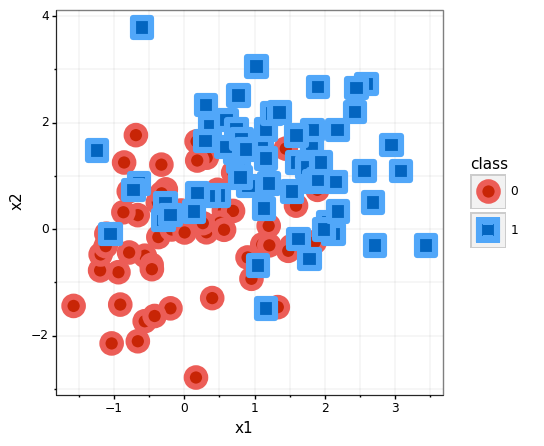

<ggplot: (8768211129664)>

In [ ]:
# let's test it!
draw_points_ggplot2(train)

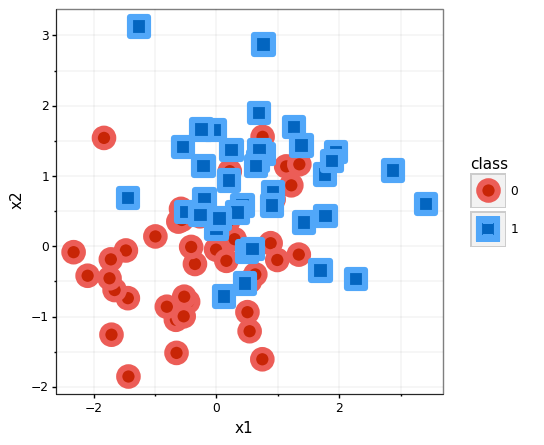

<ggplot: (8768213830348)>

In [ ]:
draw_points_ggplot2(val)

Now we will train three different classifiers, namely DT, KNN and LogisticRegression, which is a classifier despite the name. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# a new guest - Logistic regression,
# this is actually a classifier (https://en.wikipedia.org/wiki/Logistic_regression)
from sklearn.linear_model import LogisticRegression 

np.random.seed(1111) # random seed for consistency

# define all three classifiers
model1 = DecisionTreeClassifier(max_depth = 5)
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

# train classifiers
model1.fit(train[['x1', 'x2']],train[['class']])
model2.fit(train[['x1', 'x2']],train[['class']])
model3.fit(train[['x1', 'x2']],train[['class']])

# predict validation set
val['model1'] = model1.predict(val[['x1', 'x2']])
val['model2'] = model2.predict(val[['x1', 'x2']])
val['model3'] = model3.predict(val[['x1', 'x2']])

Let's take a look at the current state of `val` 

In [ ]:
val.head()

x1        x2 class  model1  model2  model3
129 -1.440817  0.689593     1       0       0       0
79  -2.095889 -0.418547     0       0       0       0
126 -0.492024  0.490871     1       0       0       0
132 -0.197042  0.676853     1       1       0       0
35   0.217625  1.068660     0       1       0       1

Now that we have predictions from all three models, it is time to combine them using majority vote. Make a new column `ensemble` in the pandas data.frame `val` with ensembled predictions from three models. How can you do it? Hint: what mathematical function returns the value that appears most often. 

In [ ]:
val[['model1']].mode(axis = 1)

0
129  0
79   0
126  0
132  1
35   1
..  ..
188  1
22   0
102  1
124  0
85   0

[80 rows x 1 columns]

In [ ]:
val[['model1']].value_counts()

model1
0         46
1         34
dtype: int64

In [ ]:
##### YOUR CODE STARTS #####
val['ensemble'] = val[['model1', 'model2', 'model3']].mode(axis = 1)
##### YOUR CODE ENDS #####

Finally, let's make sure we got it right:

In [ ]:
val.head()

x1        x2 class  model1  model2  model3  ensemble
129 -1.440817  0.689593     1       0       0       0         0
79  -2.095889 -0.418547     0       0       0       0         0
126 -0.492024  0.490871     1       0       0       0         0
132 -0.197042  0.676853     1       1       0       0         0
35   0.217625  1.068660     0       1       0       1         1

Let's evaluate three models and ensemble using accuracy. One handy way to compute accuracy of the `sklearn` model is to use function `score`. Each classification model has it own `score` method but in our case all of them return accuracy by default. You can use your own metric or choose one from the exhaustive list: https://scikit-learn.org/stable/modules/model_evaluation.html. 

In [ ]:
print(f"Accuracy of DT {model1.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of KNN {model2.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of LR {model3.score(val[['x1', 'x2']], val['class'])*100}%")

Accuracy of DT 70.0%
Accuracy of KNN 72.5%
Accuracy of LR 73.75%


This trick will not work for ensemble (as we don't have a model object to call function `score`). Let's calculate the accuracy in old school way.

In [ ]:
print(f"Accuracy of ensemble of DT, NN and LR {(np.sum(val['ensemble'] == val['class'])/len(val))*100}%")

Accuracy of ensemble of DT, NN and LR 76.25%


Let's visualise decision boundaries of three classifiers and the ensemble.

In [ ]:
 def generate_grid(start, stop, ppu):
  """
  Function that creates data for the 
  decision boundary visualisation. 
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

In [ ]:
start = -3 
stop = 4
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)
print(grid_data.shape) # it should be (19600, 2)

(19600, 2)


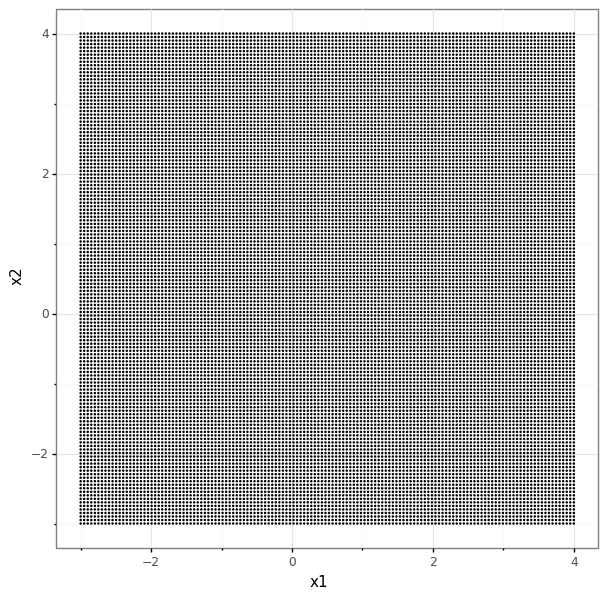

<ggplot: (-9223363268640942434)>

In [ ]:
fig = (
    ggplot(data = grid_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(colour = 'black', size = 0.005) +
    labs(title ='', x = 'x1', y = 'x2') +
    theme_bw() + 
    theme(figure_size = (7, 7))
  )
fig

Now that you have the grid, predict each point of this grid by each of our models, including the ensemble:

In [ ]:
##### YOUR CODE STARTS #####
grid_data['model1'] = model1.predict(grid_data[['x1', 'x2']])
grid_data['model2'] = model2.predict(grid_data[['x1', 'x2']])
grid_data['model3'] = model3.predict(grid_data[['x1', 'x2']])
grid_data['ensemble'] = grid_data[['model1', 'model2', 'model3']].mode(axis = 1)
##### YOUR CODE ENDS #####

We are ready to visualise each model covered with its respecting decision area

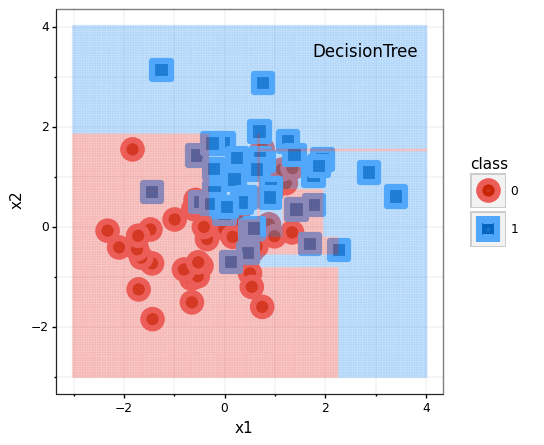

<ggplot: (8768213785117)>

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2) + annotate("text", label = "DecisionTree", x = 2.8, y = 3.5, size = 12, colour = "black")

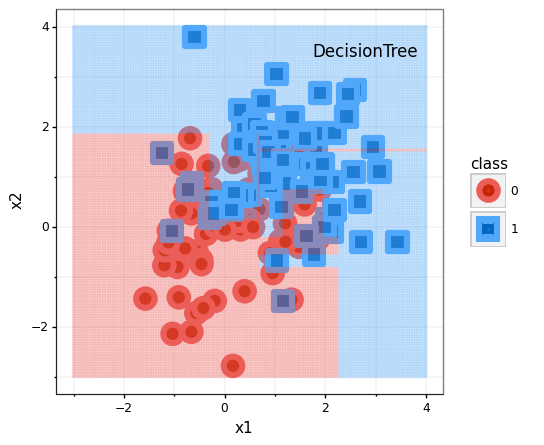

<ggplot: (-9223363268641000844)>

In [ ]:
draw_points_ggplot2(train) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2) + annotate("text", label = "DecisionTree", x = 2.8, y = 3.5, size = 12, colour = "black")

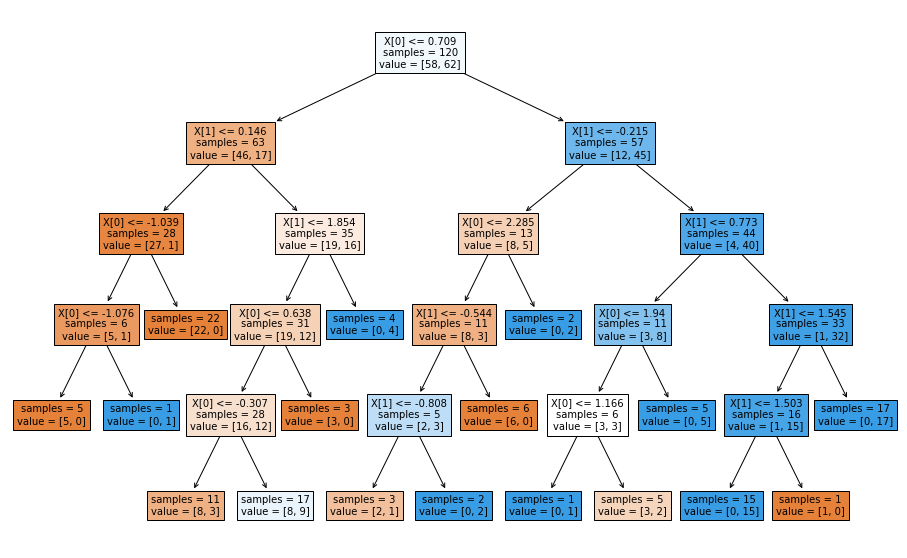

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 10))
plot_tree(model1, impurity=False, fontsize = 10, filled = True)
plt.show()

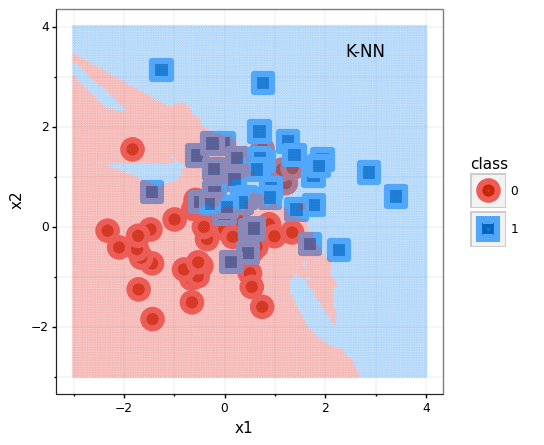

<ggplot: (-9223363268643716464)>

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model2)'),  size = .5, alpha = 0.2) + annotate("text", label = "K-NN", x = 2.8, y = 3.5, size = 12, colour = "black")

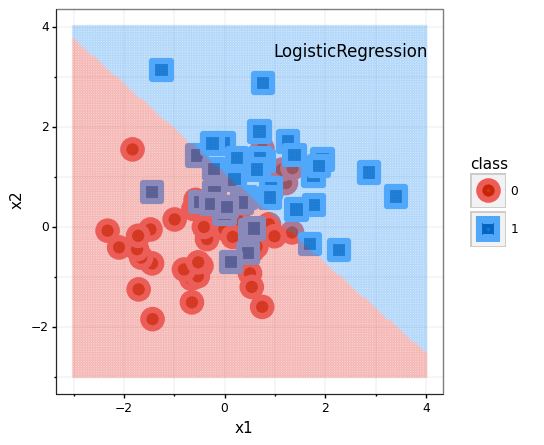

<ggplot: (8768211026212)>

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model3)'),  size = .5, alpha = 0.2) + annotate("text", label = "LogisticRegression", x = 2.5, y = 3.5, size = 12, colour = "black")

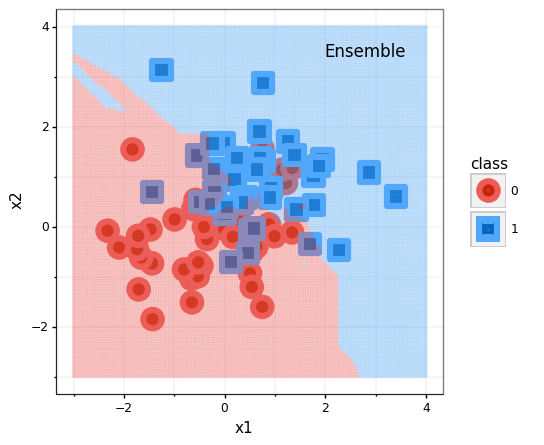

<ggplot: (8768208475144)>

In [ ]:
draw_points_ggplot2(val) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(ensemble)'),  size = .5, alpha = 0.2) + annotate("text", label = "Ensemble", x = 2.8, y = 3.5, size = 12, colour = "black")

Our traditional show, "how the same is implemented in `sklearn` using one line of code?". Today our guest is `VotingClassifier`, this function implements simple ensemble using different classifiers. Let's see how it works.

In [ ]:
# Import our guest
from sklearn.ensemble import VotingClassifier
np.random.seed(1111) # nothing interesting here, read on

# Specify correct estimators/classifiers
ensemble_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('logr', model3)], voting='hard')

# Train the VotingClassifier model on training data 
ensemble_model.fit(train[['x1', 'x2']],train[['class']])

# Predict validation data using trained model
val['ensemble'] = ensemble_model.predict(val[['x1', 'x2']])

# Use score function to evaluate VotingClassifier's performance
print(f"Accuracy of sklearn ensemble {ensemble_model.score(val[['x1', 'x2']], val[['class']])*100}%")

Accuracy of sklearn ensemble 76.25%


To remind ourselves the accuracy of our handmade ensemble and individual models:

In [ ]:
print(f"Accuracy of our ensemble was {np.mean(val['ensemble'] == val['class'])*100}%")
print(f"Accuracy of DT {model1.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of KNN {model2.score(val[['x1', 'x2']], val['class'])*100}%")
print(f"Accuracy of LR {model3.score(val[['x1', 'x2']], val['class'])*100}%")

Accuracy of our ensemble was 76.25%
Accuracy of DT 70.0%
Accuracy of KNN 72.5%
Accuracy of LR 73.75%


## Weighted ensemble (Classification)
As we learnt in the lecture sometimes we prefer to trust some classifiers more than others and this is reflected in the way how ensembles are constructed. Here we will use MNIST dataset to test weighted ensembling approach. 

In the meantime, some setup code:

In [ ]:
from keras.datasets import mnist
(images, labels) = mnist.load_data()[0]

# reshape into a matrix format
images = images.reshape(-1, 28*28)

# use fewer images for faster training
train_images = images[0:2000]
train_labels = labels[0:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

train_images = pd.DataFrame(train_images)
test_images = pd.DataFrame(test_images)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# initialize model templates
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('lr', model3)], voting='hard')

Train each model on the training images

In [ ]:
np.random.seed(1111) 
model1.fit(train_images, train_labels)

np.random.seed(1111) 
model2.fit(train_images, train_labels)

np.random.seed(1111) 
model3.fit(train_images, train_labels)

np.random.seed(1111) 
model.fit(train_images, train_labels)
print('done')

done


Here we predit classes for test images

In [ ]:
model1_pred = model1.predict(test_images)
model2_pred = model2.predict(test_images)
model3_pred = model3.predict(test_images)
ensemble_pred = model.predict(test_images)

In [ ]:
print(f"Accuracy of DT {model1.score(test_images, test_labels)*100}%")
print(f"Accuracy of KNN {model2.score(test_images, test_labels)*100}%")
print(f"Accuracy of LR {model3.score(test_images, test_labels)*100}%")
print(f"Accuracy of ensemble {model.score(test_images, test_labels)*100}%")

Accuracy of DT 76.6%
Accuracy of KNN 91.2%
Accuracy of LR 87.8%
Accuracy of ensemble 90.2%


~90% is not the greatest performance. Let's see if we can improve it.
`VotingClassifier` has a parameter `weights` which specifies the "level of trust" that we have in each of the models, higher the weight more we trusth the model. Let's replicate the basic ensemble using parameter `weights`

In [ ]:
np.random.seed(1111) 

##### YOUR CODE STARTS #####
# set equal weights for each of the classifiers to reproduce the basic majority vote ensemble:
model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('lr', model3)], voting='hard', weights = [0.2,0.45,0.35])
# then try something like [0.2,0.4,0.4]
##### YOUR CODE ENDS #####

model.fit(train_images, train_labels)
print(f"Accuracy of ensemble {model.score(test_images, test_labels)*100}%")

Accuracy of ensemble 91.0%


Now let's change the weights. As we saw on the lecture model's performance across CV iterations seems to be a reasonable ground for estimating the trust we have in model. We could have used `KFold` function again to implement CV (as in HW4), but this time, we will use a `cross_val_score` function from `sklearn`!

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

X = np.array(train_images)
y = np.array(train_labels)

scores_model1 = cross_val_score(model1, X, y, cv = KFold(shuffle = True, n_splits = 4))
print(f'Average validation accuracy for model1 is {np.mean(scores_model1)}')

scores_model2 = cross_val_score(model2, X, y, cv = KFold(shuffle = True, n_splits = 4))
print(f'Average validation accuracy for model2 is {np.mean(scores_model2)}')

scores_model3 = cross_val_score(model3, X, y, cv = KFold(shuffle = True, n_splits = 4))
print(f'Average validation accuracy for model3 is {np.mean(scores_model3)}')

Average validation accuracy for model1 is 0.71
Average validation accuracy for model2 is 0.891
Average validation accuracy for model3 is 0.864


**NB!** Keep in mind that `cross_val_score` by itself does not shuffle your data, you can pass `KFold` object as a value for `cv` parameter. This `KFold` object should be created from your data using option `shuffle=True`. 

*As you can see it possible to reuse existing libraries for cleaner code, but it is also very useful to know/remember what is it under the hood.*

We should use CV scores to infer model weights in the ensemble.

In [ ]:
val_fold_acc = np.array([np.mean(scores_model1), np.mean(scores_model2), np.mean(scores_model3)])
print(val_fold_acc)

[0.71  0.891 0.864]


Normalising these scores by sum division (optional)

In [ ]:
weights = val_fold_acc/np.sum(val_fold_acc)
print(weights)

# we initially tried 0.2 , 0.4, 0.4

[0.28803245 0.36146045 0.3505071 ]


In [ ]:
np.random.seed(1111) 

##### YOUR CODE STARTS #####
model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('lr', model3)], voting='hard', weights = weights)
##### YOUR CODE ENDS #####

# Train a new ensemble
model.fit(train_images, train_labels)

# Evaluate it's performance on the test images
print(f"Accuracy of ensemble {model.score(test_images, test_labels)*100}%")

Accuracy of ensemble 91.0%


# Bagging (**B**ootstrap + **AGG**regation = **BAGG**ing)

## Bootstrap (1st step)

Here is the familiar decision tree model we have built before:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(1111) # random seed for consistency

model1 = DecisionTreeClassifier()
model1.fit(train[['x1', 'x2']],train[['class']])
single_model_score = model1.score(val[['x1', 'x2']], val[['class']])*100
print(f"Accuracy of a single DT {single_model_score}%")

Accuracy of a single DT 62.5%


Let's bootstrap 3 equal random parts of training data. 

In [ ]:
from sklearn.utils import resample
n_bootstraps = 3
np.random.seed(1111)

# the following line randomly chooses 80% of data and stores 
# row indices into a resamples variable this is done [n_bootstraps] times
resamples = [resample(train, n_samples = int(len(train)*0.8), replace = False).index.values for i in range(n_bootstraps)]

**NB!** What is the difference between using `np.random.seed = 1111` as a separate command and `random_state = 1111` inside resample function?

In [ ]:
resamples

[array([ 66,  62, 192,  97,  33,  31, 115,  94, 121,  96, 143,  84,  70,
         89,  91,  68,  14, 136,   8,  40, 156, 165, 140, 103, 142, 171,
        181,  64,  36, 176, 162, 135,  60, 189,  69,  92, 134,   7, 141,
        110, 127, 107, 167,  75,  13,  86,  34,  44,  41, 168, 173,  17,
         82, 194, 185,   4,   3,  10,  77, 144, 170, 133, 154,  88, 157,
        125,  28,   1,  27, 118, 182, 104,   5, 147,  45,  20, 108, 106,
         12,  74,  51,  61,  19, 155, 131,  21,  32, 148,  72, 166, 137,
        197, 101, 158, 177,  78]),
 array([ 97,  45, 169, 137,  44, 114, 119, 143, 115,  28, 157,  27, 181,
        121, 110, 107, 109, 123, 179, 177, 178, 168, 140, 176,  66,   5,
         12,  41, 154, 144,  34,  53,  59,  37,  20, 170,  36,  72,  61,
        103, 167, 105,  74, 158, 101,  68, 139, 190,  17, 182,  96, 166,
         21,  91, 122,  33, 189,  70,  88, 194,  50,  62, 156, 141,   4,
         64, 133, 142,  86,   7, 108, 162,   8, 125, 148,  13, 134, 192,
        165,  82

In [ ]:
# first resample
train_resample1 = train.loc[resamples[0]]

# second resample
train_resample2 = train.loc[resamples[1]]

# third resample
train_resample3 = train.loc[resamples[2]]

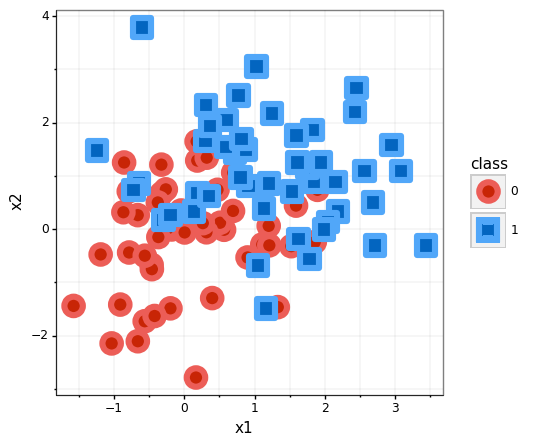

<ggplot: (-9223363268640589564)>

In [ ]:
draw_points_ggplot2(train_resample1)

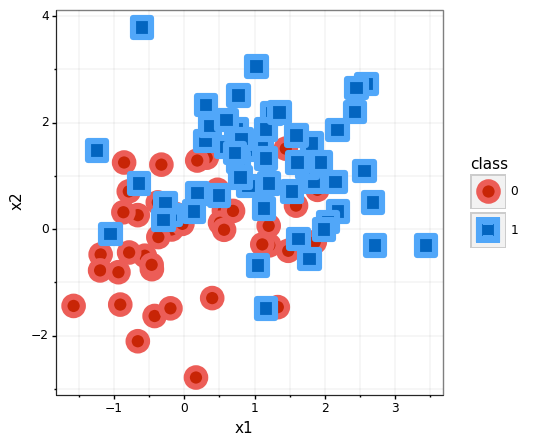

<ggplot: (-9223363268646287472)>

In [ ]:
draw_points_ggplot2(train_resample2)

Let's train **3** identical DTs on each resample.

In [ ]:
# We couldn't use only one variable as
# we wouldn't be able to capture progress of each DT independently
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()
model3 = DecisionTreeClassifier()

In [ ]:
np.random.seed(1111) # random seed for consistency

# Note, that we cannot use VotingClassifier as before, 
# as each tree has to be trained on its own data
model1.fit(train_resample1[['x1','x2']], train_resample1[['class']])
model2.fit(train_resample2[['x1','x2']], train_resample2[['class']])
model3.fit(train_resample3[['x1','x2']], train_resample3[['class']])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
start = -3 
stop = 4
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)

grid_data['model1'] = model1.predict(grid_data[['x1', 'x2']])
grid_data['model2'] = model2.predict(grid_data[['x1', 'x2']])
grid_data['model3'] = model3.predict(grid_data[['x1', 'x2']])

Let's visualise these resamples

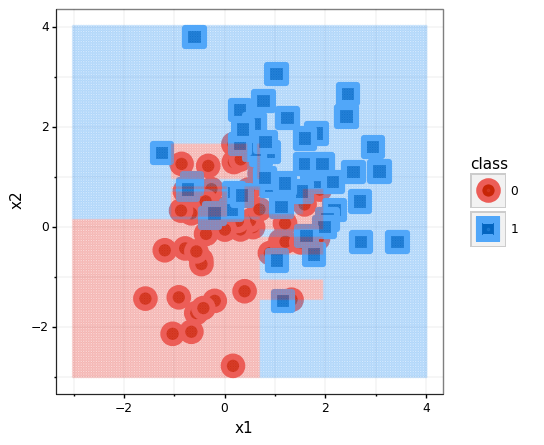

<ggplot: (8768210234653)>

In [ ]:
draw_points_ggplot2(train_resample1) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2)

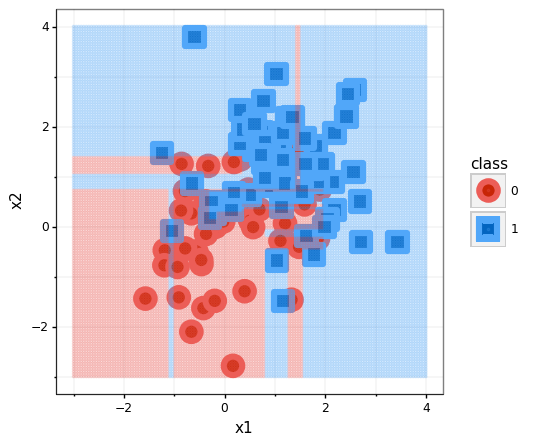

<ggplot: (8768158526479)>

In [ ]:
draw_points_ggplot2(train_resample2) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model2)'),  size = .5, alpha = 0.2)

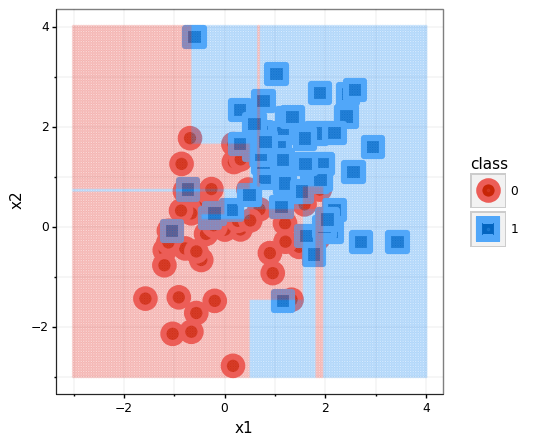

<ggplot: (8768159638739)>

In [ ]:
draw_points_ggplot2(train_resample3) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model3)'),  size = .5, alpha = 0.2)

## Aggregation (2nd step)

In [ ]:
val.head()

x1        x2 class  model1  model2  model3  ensemble
129 -1.440817  0.689593     1       0       0       0         0
79  -2.095889 -0.418547     0       0       0       0         0
126 -0.492024  0.490871     1       0       0       0         0
132 -0.197042  0.676853     1       1       0       0         0
35   0.217625  1.068660     0       1       0       1         1

In [ ]:
val['model1'] = model1.predict(val[['x1', 'x2']])
val['model2'] = model2.predict(val[['x1', 'x2']])
val['model3'] = model3.predict(val[['x1', 'x2']])

In [ ]:
val['bagg_ensemble'] = val[['model1', 'model2', 'model3']].mode(axis = 1)

In [ ]:
print(f"Accuracy of hand made bagged ensemble with 3 DTs {np.sum(val['bagg_ensemble'] == val['class'])/len(val[['class']])*100}%")

Accuracy of hand made bagged ensemble with 3 DTs 65.0%


In [ ]:
print(f"Accuracy of a single DT {single_model_score}%")

Accuracy of a single DT 62.5%


# Bagging in sklearn
Again, making things much shorter using `sklearn` :)

In [ ]:
# In sklearn, there is also BaggingRegressor as might have imagined
# BaggingClassifier is called Bagging meta-estimator
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# humdrum random seed thingy
np.random.seed(1111)
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=3, max_samples=0.8)

# Train bagger
bagger.fit(train[['x1','x2']], train['class'])

print(f"Accuracy of sklearn bagging with {3} DTs {bagger.score(val[['x1', 'x2']], val[['class']])*100}%")

Accuracy of sklearn bagging with 3 DTs 67.5%


What if we try more estimators?

In [ ]:
# Initialise our bagging classifier that consists of 9 DTs
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=11, max_samples=0.8, random_state = 1).fit(train[['x1','x2']], train['class'])

print(f"Accuracy of sklearn bagging with {100} DTs {bagger.score(val[['x1', 'x2']], val[['class']])*100}%")

Accuracy of sklearn bagging with 100 DTs 70.0%


What happens if you would try even number of estimators?



---


## Homework exercise 1: implement and train a bagging classifier with 3 K-NN models as estimators (3 points)


<font color='red'> In this exercise you will need to use `classify_knn` function from the first practice session to train three different KNN models on three resamples of this dataset. </font> 

<font color='red'>  **(Homework exercise 1- a)** Copy and adapt `classify_knn` function from the first practice session to operate on 2D points. **(1 point)**</font> 


<font color='red'> Here, I just convert pandas DataFrame into Numpy arrays that are easier to use list comphrension mechanisms on. </font> 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
np.random.seed(2342347823) # random seed, this number was random, no need to make conspiracies around it

D = 2 # two dimensions
N = 100 # points per class

whole_data = create_random_2c_data(D, N)

# Randomly splitting data into train (60%) and validation (40%)
train, val = train_test_split(whole_data, random_state = 111, test_size = 0.40) 

n_bootstraps = 3
np.random.seed(1111)

# creating resamples
resamples = [resample(train, n_samples = int(len(train)*0.8)).index.values for i in range(n_bootstraps)]

# first resample
train_resample1 = train.loc[resamples[0]]

# second resample
train_resample2 = train.loc[resamples[1]]

# third resample
train_resample3 = train.loc[resamples[2]]

In [ ]:
train1 = np.asarray(train_resample1[['x1','x2']])
labels1 = np.asarray(train_resample1[['class']]).reshape((train_resample1.shape[0]))

train2 = np.asarray(train_resample2[['x1','x2']])
labels2 = np.asarray(train_resample2[['class']]).reshape((train_resample2.shape[0]))

train3 = np.asarray(train_resample3[['x1','x2']])
labels3 = np.asarray(train_resample3[['class']]).reshape((train_resample3.shape[0]))

val_points = np.asarray(val[['x1','x2']])
val_labels = np.asarray(val[['class']]).reshape((val.shape[0]))

<font color='red'> Adapt `classify_knn` function </font> 

In [ ]:
def dist(point1, point2): # function dist is also from the first practice session
  # sum of squared coordinate-wise differences under sqrt
  return(np.sqrt(np.sum((point2 - point1)**2)))

def classify_knn(val_point, k, train, labels):

  ##### YOUR CODE STARTS #####
  all_distances = [dist(val_point, train_point) for train_point in train]
  nearest_neighbours = np.argsort(all_distances)[:k]
  shortlist = [labels[i] for i in nearest_neighbours]
  counts = np.bincount(shortlist)
  prediction = np.where(counts == np.amax(counts))[0][0]
  ##### YOUR CODE ENDS ##### (please do not delete this line)
  
  return prediction

# Use three K-NN models that work on three different resamples

<font color='red'> Test that the function was adapted correctly by running the following example </font> 

In [ ]:
val_point = val_points[1]
print(f'predicted class of the first point is {classify_knn(val_point, 5,  train1, labels1)}, while the true class is {val_labels[1]}')

predicted class of the first point is 0, while the true class is 0


<font color='red'> **(Homework exercise 1- b)** Classify each point from the validation set using `classify_knn` function. Use different resamples and list comprehension [(do something with point) for point in points]. Fix `k` at 5. **(1 point)**</font> 


In [ ]:
k = 5

##### YOUR CODE STARTS #####
val['knn1'] = [classify_knn(val_point, k, train1, labels1) for val_point in val_points] # use train1, labels1
val['knn2'] = [classify_knn(val_point, k, train2, labels2) for val_point in val_points] # use train2, labels2
val['knn3'] = [classify_knn(val_point, k, train3, labels3) for val_point in val_points] # use train3, labels3
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'> **(Homework exercise 1- c)** Aggregate individual predictions using the majority vote approach **(0.5 points)**</font> 

In [ ]:
##### YOUR CODE STARTS #####
val['knn_bagging'] = val[['knn1', 'knn2', 'knn3']].mode(axis = 1)
##### YOUR CODE ENDS ##### (please do not delete this line)

print(f"Accuracy of hand made bagged ensemble with 3 KNNs is {np.sum(val['knn_bagging'] == val['class'])/len(val[['class']])*100}%")

Accuracy of hand made bagged ensemble with 3 KNNs is 68.75%


<font color='red'> **(Homework exercise 1- d)** Use sklearn `BaggingClassifier` to implement analagous model that uses KNeighborsClassifier as an estimator (with k = 5). Don't forget to use a random state for reproducibility.

Assess its performance on the same validation set and compare to your's and comment on the results. **(0.5 points)**</font> 


In [ ]:
from sklearn.ensemble import BaggingClassifier

##### YOUR CODE STARTS #####
knn_begger = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), 
                               n_estimators=3, max_samples=0.8, random_state = 111).fit(train[['x1','x2']], train['class'])
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"Accuracy of sklearn bagging with {3} KNNs {knn_begger.score(val[['x1', 'x2']], val[['class']])*100}%")

Accuracy of sklearn bagging with 3 KNNs 73.75%


In [ ]:
# comment on the results here: The sklearn model had 5 percent better accuracy which is not
# a small difference. I would say that this may be due to the differences occurred during resampling, 
# but I am not sure since 5 percent difference seems too big for that.
# I have checked the classify_knn function during the completion of this exercise, but I couldn't
# find any incorrectness in its implementation.



---


# Random Forest algorithm
Here we will not implement the Random Forest algorithm, but we will get very close to its understanding.

First, let's regenerate some data:

In [ ]:
np.random.seed(2342347823) # random seed for consistency

D = 50
N = 50

train_data = create_random_2c_data(D, N)

from sklearn.model_selection import train_test_split
train, val = train_test_split(train_data, random_state = 111, test_size = 0.40) 

Regular `DecisionTree` will suffer from the curse of dimensionality with this high-dimensional data. Let's recreate this experiment:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 

np.random.seed(1111)
# 2D data
model.fit(train[['x1','x2']], train['class'])
print(f"Validation accuracy is {model.score(val[['x1','x2']], val[['class']])*100}%")

# 5D data
model.fit(train.iloc[:, :5], train['class'])
print(f"Validation accuracy is {model.score(val.iloc[:, :5], val[['class']])*100}%")

# 50D data
model.fit(train.iloc[:, :50], train['class'])
print(f"Validation accuracy is {model.score(val.iloc[:, :50], val[['class']])*100}%")

Validation accuracy is 80.0%
Validation accuracy is 75.0%
Validation accuracy is 65.0%


More stable estimates can be obtained using `cross_val_score` function

In [ ]:
model = DecisionTreeClassifier() 

np.random.seed(1111)

# as `cross_val_score` does not shuffle the data by itself
shuffled_train_data = train_data.sample(frac=1)

# 2D data
scores_model1 = cross_val_score(model, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 2D is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(model, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 5D is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(model, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 50D is {np.mean(scores_model3)*100}%')

Average validation accuracy on 2D is 73.0%
Average validation accuracy on 5D is 75.0%
Average validation accuracy on 50D is 72.00000000000001%


Not a fair comparison, because DTs are single trees, while random forest is a bagging classifier

In [ ]:
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8, n_estimators=9, random_state=1111)

# 2D data
scores_model1 = cross_val_score(bagger, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 2D is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(bagger, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 5D is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(bagger, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 50D is {np.mean(scores_model3)*100}%')

Average validation accuracy on 2D is 76.00000000000001%
Average validation accuracy on 5D is 76.0%
Average validation accuracy on 50D is 90.99999999999999%


To make another step from the bag of decision trees to random forest, we can set a value for `max_features` parameter to something that is less than 1.0 (e.g. 0.8). This would ensure that every tree in the bag receives a random set of initial features.

In [ ]:
bagger = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples = 0.8, max_features = 0.8, n_estimators=9, random_state=1111)

# 2D data
scores_model1 = cross_val_score(bagger, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 2D is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(bagger, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 5D is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(bagger, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy on 50D is {np.mean(scores_model3)*100}%')

Average validation accuracy on 2D is 67.0%
Average validation accuracy on 5D is 80.0%
Average validation accuracy on 50D is 88.99999999999999%


Finally, let's train the random classifier itself.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

np.random.seed(1111)

# 2D data
scores_model1 = cross_val_score(model, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model1 is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(model, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model1 is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(model, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=4)
print(f'Average validation accuracy for model1 is {np.mean(scores_model3)*100}%')

Average validation accuracy for model1 is 80.0%
Average validation accuracy for model1 is 84.00000000000001%
Average validation accuracy for model1 is 98.0%


Extremely Randomized Trees (extreme RF)
via https://link.springer.com/article/10.1007/s10994-006-6226-1

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

np.random.seed(1111)

# 2D data
scores_model1 = cross_val_score(model, shuffled_train_data[['x1','x2']], shuffled_train_data['class'], cv=10)
print(f'Average validation accuracy for model1 is {np.mean(scores_model1)*100}%')

# 5D data
scores_model2 = cross_val_score(model, shuffled_train_data.iloc[:, :5], shuffled_train_data['class'], cv=10)
print(f'Average validation accuracy for model1 is {np.mean(scores_model2)*100}%')

# 50D data
scores_model3 = cross_val_score(model, shuffled_train_data.iloc[:, :50], shuffled_train_data['class'], cv=10)
print(f'Average validation accuracy for model1 is {np.mean(scores_model3)*100}%')

Average validation accuracy for model1 is 82.0%
Average validation accuracy for model1 is 88.00000000000001%
Average validation accuracy for model1 is 99.0%


# Setup before the second part

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install plotnine
from plotnine import *

In [ ]:
def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

In [ ]:
 def generate_grid(start, stop, ppu):
  """
  Function that creates data for the 
  decision boundary visualisation. 
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

In [ ]:
start = 0 
stop = 6
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)
grid_data.shape

(14400, 2)

# Boosting

## Adaptive boosting (Adaboost)
We shall build decision stumps (decision trees of depth 1) on the toy data.

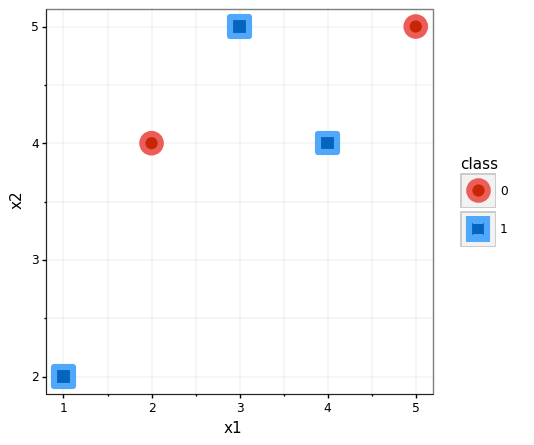

<ggplot: (8768158053219)>

In [ ]:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories
draw_points_ggplot2(example_data)

Let's see how the usual decision tree would look like on this data.

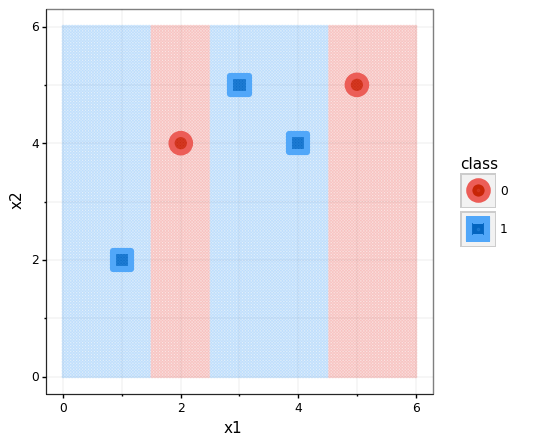

<ggplot: (-9223363268697185178)>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

# training a decision tree classifier on example data
dt.fit(example_data[['x1', 'x2']], example_data[['class']])

# predicting grid data
grid_data['dt'] = dt.predict(grid_data[['x1', 'x2']])

# visualise the initial egalitarian tree
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(dt)'),  size = .5, alpha = 0.2)

Here we shall build a boosting ensemble. Let's build the first decision stump:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=1) # remember that it can only have 1 level

In [ ]:
initial_weights = np.ones(len(example_data)) # egalitarian world
print(initial_weights)

np.random.seed(1111)

model1.fit(example_data[['x1', 'x2']], example_data[['class']], sample_weight = initial_weights)

[1. 1. 1. 1. 1.]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

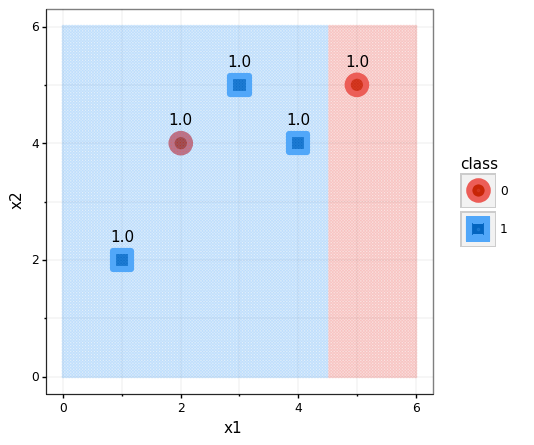

<ggplot: (-9223363268697331382)>

In [ ]:
grid_data['model1'] = model1.predict(grid_data[['x1', 'x2']])

# visualise the initial egalitarian tree
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2) + geom_text(aes(label = initial_weights), nudge_y = 0.4)

In [ ]:
incorrect = model1.predict(example_data[['x1', 'x2']]) != example_data['class']
print(np.array(incorrect))

[False  True False False False]


In [ ]:
np.array(~incorrect)

array([ True, False,  True,  True,  True])

**Exercise** update the weights as discussed in the lecture (add score of 0.5 to those points that were misclassified and remove 0.5 from classified correctly) 

In [ ]:
import copy
new_weights = copy.deepcopy(initial_weights)
##### YOUR CODE STARTS #####
new_weights[np.array(~incorrect)] -=0.5
new_weights[np.array(incorrect)] +=0.5
##### YOUR CODE ENDS #####

print(new_weights)

[0.5 1.5 0.5 0.5 0.5]


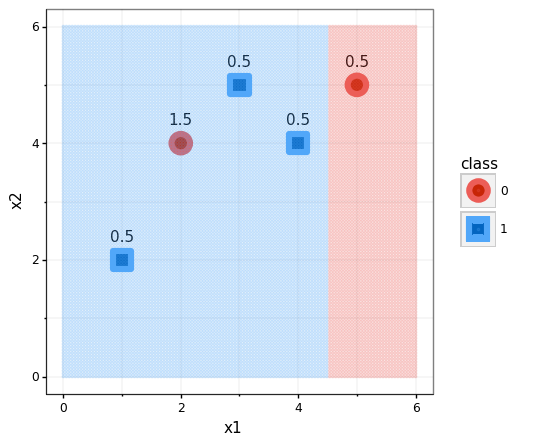

<ggplot: (8768157958015)>

In [ ]:
draw_points_ggplot2(example_data) + geom_text(aes(label = new_weights), nudge_y = 0.4) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2)

**Exercise** Repeat the same process for models #2 and #3.

Let's build the second tree using these new weights

In [ ]:
np.random.seed(1111)
##### YOUR CODE STARTS #####
model2 = DecisionTreeClassifier(max_depth=1)
model2.fit(example_data[['x1', 'x2']], example_data[['class']], sample_weight = new_weights)
##### YOUR CODE ENDS #####

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualising boundaries of the second tree:

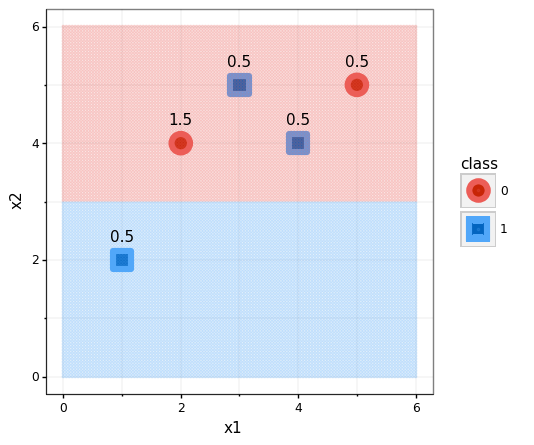

<ggplot: (-9223363268697573032)>

In [ ]:
##### YOUR CODE STARTS #####
grid_data['model2'] = model2.predict(grid_data[['x1','x2']])
##### YOUR CODE ENDS #####
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model2)'),  size = .5, alpha = 0.2) + geom_text(aes(label = new_weights), nudge_y = 0.4)

In [ ]:
##### YOUR CODE STARTS #####
incorrect = model2.predict(example_data[['x1','x2']]) != example_data['class']
##### YOUR CODE ENDS ####

print(np.array(incorrect))

[False False  True  True False]


Changing the weights for the second time:

In [ ]:
##### YOUR CODE STARTS #####
newer_weights = copy.deepcopy(new_weights)
newer_weights[np.array(incorrect)] += 0.5
newer_weights[np.array(~incorrect)] -= 0.5
##### YOUR CODE ENDS #####
print(newer_weights)

[0. 1. 1. 1. 0.]


In [ ]:
np.random.seed(1111)

model3 = DecisionTreeClassifier(max_depth=1)
##### YOUR CODE STARTS #####
model3.fit(example_data[['x1', 'x2']], example_data[['class']], sample_weight = newer_weights)
##### YOUR CODE ENDS #####

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualising the decision boundaries of the third tree

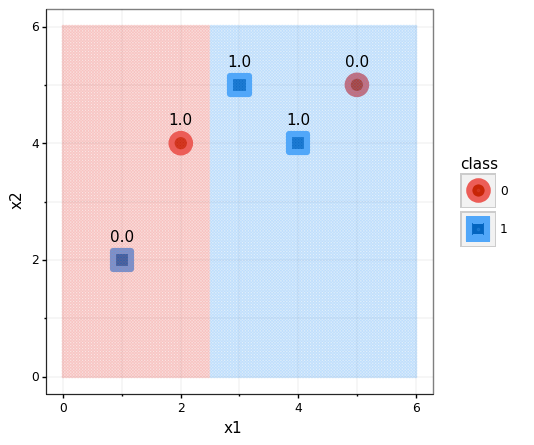

<ggplot: (8768157122729)>

In [ ]:
##### YOUR CODE STARTS #####
grid_data['model3'] = model3.predict(grid_data[['x1','x2']])
##### YOUR CODE ENDS #####
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model3)'),  size = .5, alpha = 0.2) + geom_text(aes(label = newer_weights), nudge_y = 0.4)

Putting all these trees together into one model

In [ ]:
grid_data[['model1', 'model2', 'model3']].tail()

model1  model2  model3
14395       0       0       1
14396       0       0       1
14397       0       0       1
14398       0       0       1
14399       0       0       1

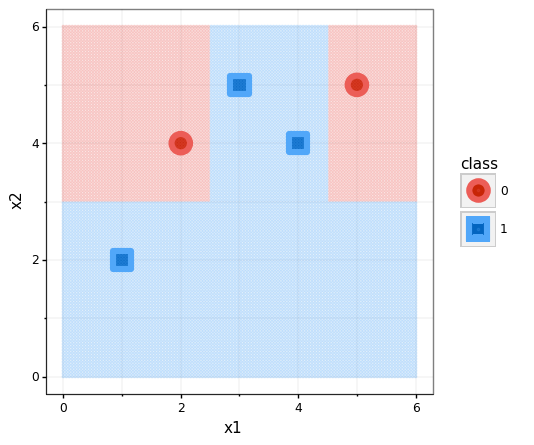

<ggplot: (-9223363268697316664)>

In [ ]:
grid_data['ensemble'] = grid_data[['model1', 'model2', 'model3']].mode(axis = 1)
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(ensemble)'),  size = .5, alpha = 0.2)

Let's compare to the official `AdaBoostClassifier` implmentation from the `sklearn`. Pay attention to the parameters, we want 3 models, with each one of them being `DecisionTreeClassifier` with `max_depth = 1`.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)

# train AdaBoost on our data
np.random.seed(1111)
model.fit(example_data[['x1','x2']], example_data[['class']])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Here we visualise AdaBoost decision boundaries

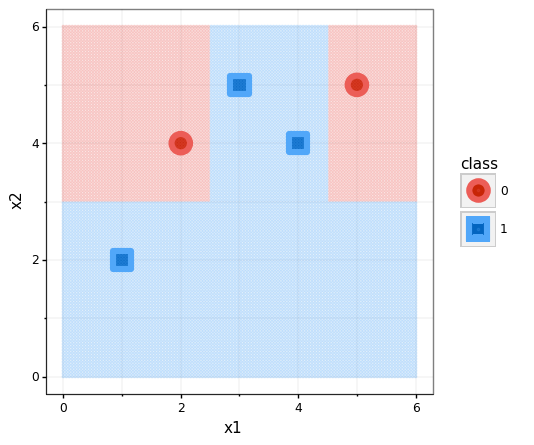

<ggplot: (-9223363268696776658)>

In [ ]:
grid_data['ada_ensemble'] = model.predict(grid_data[['x1', 'x2']])
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(ada_ensemble)'),  size = .5, alpha = 0.2)

## Gradient boosting machines (GBM)

In [ ]:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
# note that now we actually don't turn "class" into categorical
# we will treat this problem as regreession now

Fit the first **`DecisionTreeRegressor`** model on the original data. I have not found any restrictions on the size of the tree for the gradient boosting algorithm, but let's keep decision stumps as before.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth=1) # let's keep 1 level trees

np.random.seed(111)

model1.fit(example_data[['x1', 'x2']], example_data[['class']])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Now, let's predict the data using this first tree

In [ ]:
predictions_model1 = model1.predict(example_data[['x1','x2']])
print(f'predictions of the first tree: {predictions_model1}')

predictions of the first tree: [0.75 0.75 0.75 0.75 0.  ]


Find the residuals (subtract predictions from the ground truth)

In [ ]:
errors_model1 = example_data['class'] - predictions_model1
print(f'residuals: {np.array(errors_model1)}')

residuals: [ 0.25 -0.75  0.25  0.25  0.  ]


Now use these errors as a `target` for the second tree!

In [ ]:
np.random.seed(1111)

model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X = example_data[['x1', 'x2']], y = errors_model1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**Exercise** implement the same procedure for the second and third models

In [ ]:
##### YOUR CODE STARTS #####
predictions_model2 = model2.predict(example_data[['x1','x2']])
##### YOUR CODE ENDS #####
print(f'predictions of the second tree: {predictions_model2}')

predictions of the second tree: [-0.25       -0.25        0.16666667  0.16666667  0.16666667]


Add these to the predictions obtained by the first model. Subtract the resulting sum from the ground truth.

In [ ]:
##### YOUR CODE STARTS #####
errors_model2 = errors_model1 - predictions_model2
##### YOUR CODE ENDS #####
print(f'residuals: {np.array(errors_model2)}')

residuals: [ 0.5        -0.5         0.08333333  0.08333333 -0.16666667]


Do the same for the last third tree

In [ ]:
np.random.seed(1111)

##### YOUR CODE STARTS #####
model3 = DecisionTreeRegressor(max_depth=1)
model3.fit(X = example_data[['x1', 'x2']], y = errors_model2)
##### YOUR CODE ENDS #####

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
##### YOUR CODE STARTS #####
predictions_model3 = model3.predict(example_data[['x1', 'x2']])
##### YOUR CODE ENDS #####
print(f'predictions of the first tree: {predictions_model3}')

predictions of the first tree: [ 0.5   -0.125 -0.125 -0.125 -0.125]


In [ ]:
##### YOUR CODE STARTS #####
errors_model3 = errors_model2 - predictions_model3
##### YOUR CODE ENDS #####
print(f'residuals: {np.array(errors_model3)}')

residuals: [ 0.         -0.375       0.20833333  0.20833333 -0.04166667]


In [ ]:
grid_data['gbm'] = model1.predict(grid_data[['x1', 'x2']]) + model2.predict(grid_data[['x1', 'x2']]) + model3.predict(grid_data[['x1', 'x2']])

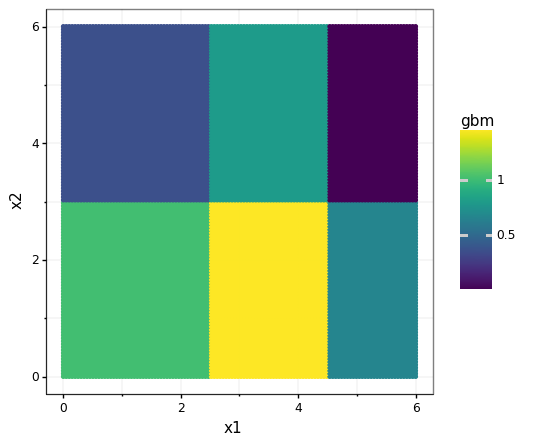

<ggplot: (-9223363268697695137)>

In [ ]:
fig = (
    ggplot(data = grid_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'gbm'), 
               size = 1.0) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
fig

In [ ]:
grid_data.loc[grid_data['gbm'] < 0.5, 'gbm'] = 0
grid_data.loc[grid_data['gbm'] >= 0.5, 'gbm'] = 1

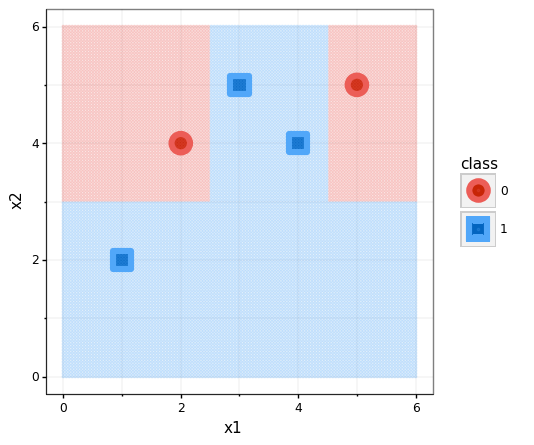

<ggplot: (8768157450651)>

In [ ]:
example_data['class'] = example_data['class'].astype('category') # now we can cast `class` back into categorical
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(gbm)'),  size = .5, alpha = 0.2)

### Gradient Boosting from sklearn (just verify the results)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=3, random_state=1, max_depth=3) # uses DecisionTreeRegressor by default

# train GBM on our data
np.random.seed(1111)
gbm.fit(example_data[['x1','x2']], example_data[['class']])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

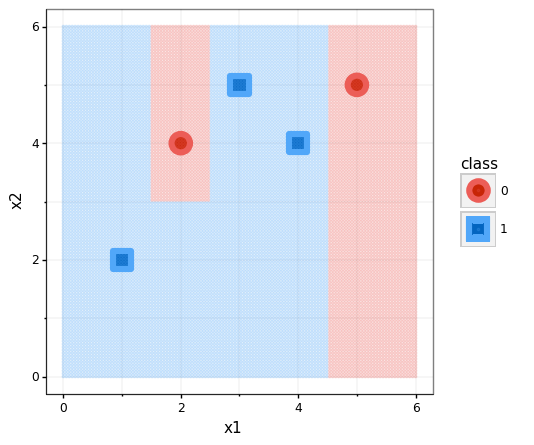

<ggplot: (-9223363268697576988)>

In [ ]:
grid_data['gbm_ensemble'] = gbm.predict(grid_data[['x1', 'x2']])
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(gbm_ensemble)'),  size = .5, alpha = 0.2)

## Homework exercise 2: eXtreme Gradient Boosting (XGBoost) (4 points)

<font color='red'> Let's finally build for ourselves a new shiny XGBoost model, the most popular algorithm for Kaggle competitions. </font>

<font color='red'> First, we need to load data (we shall use MNIST data again). </font>

In [ ]:
from keras.datasets import mnist
(images, labels) = mnist.load_data()[0]

# reshape into a matrix format
images = images.reshape(-1, 28*28)

# use fewer images for faster training
train_images = images[0:2000]
train_labels = labels[0:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

<font color='red'> **(Homework exercise 2- a)** Use the tutorial page (https://xgboost.readthedocs.io/en/latest/python/python_intro.html and https://www.kaggle.com/anktplwl91/mnist-xgboost) to fill in the gaps in the following code and traing the XGBoost model. **(1 point)** </font>

In [ ]:
import xgboost as xgb

##### YOUR CODE STARTS #####
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split

sc = StandardScaler()
train_std = sc.fit_transform(train_images)
test_std = sc.fit_transform(test_images)

#X_train, X_valid, y_train, y_valid = train_test_split(train_std, train_labels, test_size=0.1)

# XGBoosts wants data to be wrapped into special formats
dtrain = xgb.DMatrix(train_std, label=train_labels)
dtest = xgb.DMatrix(test_std, label=test_labels)

# most meaningful parameters
param_list = [("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]

# Number of trees
n_rounds = 600

# if nothing seems to improve for 50 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(dtrain, "train"), (dtest, "validation")]

# 1,2,3.. go!
bst = xgb.train(param_list, dtrain, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)
##### YOUR CODE ENDS #####

[0]	train-merror:0.078	validation-merror:0.508
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.041	validation-merror:0.437
[2]	train-merror:0.0275	validation-merror:0.374
[3]	train-merror:0.013	validation-merror:0.303
[4]	train-merror:0.0105	validation-merror:0.279
[5]	train-merror:0.0085	validation-merror:0.256
[6]	train-merror:0.006	validation-merror:0.244
[7]	train-merror:0.004	validation-merror:0.231
[8]	train-merror:0.0035	validation-merror:0.217
[9]	train-merror:0.0015	validation-merror:0.2
[10]	train-merror:0	validation-merror:0.188
[11]	train-merror:0	validation-merror:0.181
[12]	train-merror:0	validation-merror:0.171
[13]	train-merror:0	validation-merror:0.176
[14]	train-merror:0	validation-merror:0.17
[15]	train-merror:0	validation-merror:0.168
[16]	train-merror:0	validation-merror:0.171
[17]	train-merror:0	validation-merror:0.17
[18]	train-merror:

<font color='red'> **(Homework exercise 2- b)** Use the same tutorial page (https://xgboost.readthedocs.io/en/latest/python/python_intro.html) to find out how to evaluate the model **(1 point)** </font>

In [ ]:
##### YOUR CODE STARTS #####
print('Lowest Error Obtained for Test Set(in percentage):', bst.best_score*100)
print('Test Accuracy(in percentage):', (1 - bst.best_score)*100)
print('At iteration:', bst.best_iteration)
##### YOUR CODE ENDS #####

Lowest Error Obtained for Test Set(in percentage): 11.3
Test Accuracy(in percentage): 88.7
At iteration: 110


<font color='red'> Are you impressed with XGBoost performance? </font>

With an error rate of 11.3 %, I can say that XGBoost is a good algorithm for creating a baseline model, that will be later improved by careful hyperparameter tuning or a neural network. Considering the rather lower computational cost compared to deep neural networks, XGBoost can also be useful for deployment in some cases as well.

<font color='red'> **(Homework exercise 2- c)** Train a simple KNN model from sklearn (KNeighborsClassifier) on the same training data and evaluate on the same validation data **(1 point)** </font>

In [ ]:
##### YOUR CODE STARTS #####
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_std, train_labels)
knn.score(test_std, test_labels)*100
# four lines, 10 times faster, one parameter and almost the same score...
##### YOUR CODE ENDS #####

87.4

<font color='red'> How these two models compare? </font>

In [ ]:
# Write your comment here: XGBoost takes the lead by 1.3(88.7 vs 87.4) points in terms of accuracy, 
# but it took around 10 times more to train it(knn running time was 5.4 seconds, 
# while xgb took approx. 56.2 seconds to train). So the XGB result may not be satisfactory for 
# deployment if the resources were limited. However, I should also note that we have not tuned the
# XGB model, which might have resulted in a considerable increase in accuracy.

<font color='red'> **(Homework exercise 2- d)** Improve XGBoost's performance by at least 4% without changing the model parameters. **(1 point)** </font>

In [ ]:
##### YOUR CODE STARTS #####
# Do something here to improve XGBoost by 3-4% (test score ~0.94)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.05)
##### YOUR CODE ENDS #####

In [ ]:
##### YOUR CODE STARTS #####
# copy your XGBoost training pipeline from part (a) here:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# XGBoosts wants data to be wrapped into special formats
dtrain = xgb.DMatrix(X_train_std, label=y_train)
dtest = xgb.DMatrix(X_test_std, label=y_test)

# most meaningful parameters
param_list = [("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]

# Number of trees
n_rounds = 600

# if nothing seems to improve for 50 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(dtrain, "train"), (dtest, "validation")]

# 1,2,3.. go!
bst = xgb.train(param_list, dtrain, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)
##### YOUR CODE ENDS #####
##### YOUR CODE ENDS #####

[0]	train-merror:0.134053	validation-merror:0.224667
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.091965	validation-merror:0.187
[2]	train-merror:0.075509	validation-merror:0.164667
[3]	train-merror:0.066772	validation-merror:0.157667
[4]	train-merror:0.059211	validation-merror:0.147333
[5]	train-merror:0.053649	validation-merror:0.138
[6]	train-merror:0.048842	validation-merror:0.131333
[7]	train-merror:0.044105	validation-merror:0.110667
[8]	train-merror:0.040053	validation-merror:0.105
[9]	train-merror:0.036649	validation-merror:0.105333
[10]	train-merror:0.033263	validation-merror:0.099333
[11]	train-merror:0.030421	validation-merror:0.089667
[12]	train-merror:0.027754	validation-merror:0.090333
[13]	train-merror:0.025474	validation-merror:0.089333
[14]	train-merror:0.023421	validation-merror:0.091667
[15]	train-merror:0.021281	validation-merror:0.089

In [ ]:
##### YOUR CODE STARTS #####
# evaluate your XGBoost model as before
# it should be better than before (and better than KNN)
print('Lowest Error Obtained for Test Set(in percentage):', bst.best_score*100)
print('Test Accuracy(in percentage):', (1 - bst.best_score)*100)
print('At iteration:', bst.best_iteration)
##### YOUR CODE ENDS #####

Lowest Error Obtained for Test Set(in percentage): 2.8667000000000002
Test Accuracy(in percentage): 97.1333
At iteration: 154


In [ ]:
X_train.shape

(57000, 784)

Since I have used 57000 images for the train set, the model learned the the relations much better and thus our test accuracy increased to 97.1 percent. Yet the runtime for such a model was huge, it took around 45 minutes for the training to complete.

# Stacking
On top of everything we have seen, you can still improve the results by training the meta-learner (meta-model) that would use predictions of other models as input.

In [ ]:
from keras.datasets import mnist
(images, labels) = mnist.load_data()[0]

# reshape into a matrix format
images = images.reshape(-1, 28*28)

# use fewer images for faster training
train_images = images[0:2000]
train_labels = labels[0:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

11493376/11490434 [==============================] - 0s 0us/step


First we should again train familiar three models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

np.random.seed(1111) 
model1.fit(train_images, train_labels)

np.random.seed(1111) 
model2.fit(train_images, train_labels)

np.random.seed(1111) 
model3.fit(train_images, train_labels)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We can go ahead and test these machine learning models on the test data

In [ ]:
model1_pred = model1.predict(test_images)
model2_pred = model2.predict(test_images)
model3_pred = model3.predict(test_images)

print(f"Accuracy of DT {model1.score(test_images, test_labels)*100}%")
print(f"Accuracy of NN {model2.score(test_images, test_labels)*100}%")
print(f"Accuracy of LR {model3.score(test_images, test_labels)*100}%")

Accuracy of DT 76.6%
Accuracy of NN 91.2%
Accuracy of LR 87.8%


Classical stacking, we need to run CV algorithm and record predictions made by each model on the hold out data. Then we will use theses predictions as training data for the meta-learner.

In [ ]:
from sklearn.model_selection import StratifiedKFold

hold_out_pred_model1 = []
hold_out_pred_model2 = []
hold_out_pred_model3 = []

n_folds = 4

X = np.array(train_images)
y = np.array(train_labels)

# initialise splitting mechanism
folds = StratifiedKFold(n_splits=n_folds, shuffle = False, random_state=111) # no need to shuffle the data

# here actual splitting is done
folds.get_n_splits(X, y)

fold_indx = 1

# folds.split is an iterator that loops over different folds
# returning a tuple with train and val indeces
for train_index, val_index in folds.split(X, y):
  print(f"CV #{fold_indx}")
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  # train all three models
  model1.fit(X_train, y_train)
  model2.fit(X_train, y_train)
  model3.fit(X_train, y_train)

  # make predictions on hold out set
  ##### YOUR CODE STARTS #####
  hold_out_pred_model1.append(model1.predict_proba(X_val)) # we use predict_proba function to get a vector of probabilities for each class
  hold_out_pred_model2.append(model2.predict_proba(X_val))
  hold_out_pred_model3.append(model3.predict_proba(X_val))
  ##### YOUR CODE ENDS #####
  
  fold_indx += 1

CV #1
CV #2
CV #3
CV #4


In [ ]:
hold_out_pred_model1[0].shape

(500, 10)

In [ ]:
np.concatenate(hold_out_pred_model1, axis = 0).shape

(2000, 10)

Let's concatenate all these predictions into one dataset. Each model outputs probabilities for each class (there are 10 classes in the dataset), which means that for each digit (2000 in the training data) we will have 10 values from each model, which adds up to 30 values in total (from 3 models). 

In [ ]:
train_stacking = np.concatenate([np.concatenate(hold_out_pred_model1, axis = 0), 
                                 np.concatenate(hold_out_pred_model2, axis = 0), 
                                 np.concatenate(hold_out_pred_model3, axis = 0)], 
                                axis = 1)
train_stacking.shape

(2000, 30)

We need also a test set for the stacking model, but this is simpler

In [ ]:
model1_pred = model1.predict_proba(test_images)
model2_pred = model2.predict_proba(test_images)
model3_pred = model3.predict_proba(test_images)

test_stacking = np.concatenate([model1_pred, 
                                model2_pred, 
                                model3_pred], 
                                axis = 1)

test_stacking.shape

(1000, 30)

Train another model (e.g. LogisticRegression or DecisionTree or something else) on these predictions

In [ ]:
from sklearn.svm import SVC
stacking_model = SVC()

np.random.seed(1111) 
stacking_model.fit(train_stacking, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(f"Accuracy of stacking ensemble {stacking_model.score(test_stacking, test_labels)*100}%")

Accuracy of stacking ensemble 91.10000000000001%


## Homework exercise 3: implement blending approach (3 points)
<font color='red'> In this exercise you will practice using blending approach to meta-learning. </font>

<font color='red'> **(Homework exercise 3- a)** to implement blending we first need to create a separate validation set that would be independent from training and test data. Below, use images from 0 to 1500 as training data, images from 1500 to 2000 as validation and from 2000 to 3000 as a test set. **(0.5 points)** </font>

In [ ]:
##### YOUR CODE STARTS #####
train_images = images[0:1500]
train_labels = labels[0:1500]

val_images = images[1500:2000]
val_labels = labels[1500:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]
##### YOUR CODE ENDS #####

<font color='red'> **(Homework exercise 3- b)** Train three models (decision tree, k nearest neighbors classifier, and the logistic regression) with default parameters on the train data. **(0.5 points)** </font>

In [ ]:
##### YOUR CODE STARTS #####
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = LogisticRegression()
##### YOUR CODE ENDS #####

np.random.seed(1111) 
##### YOUR CODE STARTS #####
model1.fit(train_images, train_labels)
##### YOUR CODE ENDS #####

np.random.seed(1111) 
##### YOUR CODE STARTS #####
model2.fit(train_images, train_labels)
##### YOUR CODE ENDS #####

np.random.seed(1111) 
##### YOUR CODE STARTS #####
model3.fit(train_images, train_labels)
##### YOUR CODE ENDS #####

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<font color='red'> **(Homework exercise 3- c)** Create a training set for the meta-learner by concatenating the predictions made by individual models on validation images. Hint: use function `np.concatenate` and `predict_proba` as we did for stacking. **(0.5 points)** </font>

In [ ]:
##### YOUR CODE STARTS #####
train_blending = np.concatenate([model1.predict_proba(val_images),
                                 model2.predict_proba(val_images),
                                 model3.predict_proba(val_images)],
                                axis=1)
##### YOUR CODE ENDS #####

train_blending_labels = val_labels
train_blending.shape # if all was done correctly this shape should be (500, 30)

(500, 30)

<font color='red'> **(Homework exercise 3- d)** Create a test set for the meta-learner by concatenating the predictions made by each model on test images. Use the same function as in the cell above. **(0.5 points)** </font>

In [ ]:
##### YOUR CODE STARTS #####
test_blending = np.concatenate([model1.predict_proba(test_images),
                                model2.predict_proba(test_images),
                                model3.predict_proba(test_images)],
                               axis=1)
##### YOUR CODE ENDS #####

test_blending.shape # if all was done correctly this shape should be (1000, 30)

(1000, 30)

<font color='red'> **(Homework exercise 3- e)** Use a new model (SVM) as a meta-learner and train it on the `train_blending` data. **(0.5 points)** </font>

In [ ]:
from sklearn.svm import SVC
np.random.seed(1111) 

##### YOUR CODE STARTS #####
blending_model = SVC()
blending_model.fit(train_blending, val_labels)
##### YOUR CODE ENDS #####

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<font color='red'> **(Homework exercise 3- f)** Evaluate the performance of the blending ensemble on the test set and comment on the difference between blending and stacking.  **(0.5 points)** </font>

In [ ]:
##### YOUR CODE STARTS #####
print(f"Accuracy of stacking ensemble {blending_model.score(test_blending, test_labels)*100}%")
##### YOUR CODE ENDS #####

Accuracy of stacking ensemble 89.8%


In [ ]:
# What is your take on the difference between blending and stacking?
# Which one would you prefer and why?
# Comment here: I would prefer the stacking model since it had an accuracy of 91.1 percent,
# while blending had 89.8 percent accuracy. Stacking model took a little bit more time 
# to train but that is acceptable. The accuracy difference is probably due to using CV
# for stacking compared to the hold-out validation set approach of blending. By using
# different parts of the train set as hold-out, the meta learner had more varied inputs
# during its training and thus generalized better on the test set.

In [ ]:
# Add your comments here:


# Bonus exercises
*(NB, these are optional exercises!)*
 

## Bonus exercise 1 (2 bonus points):
<font color='red'> We have seen that in general increasing the number of estimators in an ensemble leads to better performance. In this exercise, you will experiment with the number of estimators in different ensemblers to explore **convergence behavior** and **overfitting**.  
You will compare the performance of **bagging of decision trees, random forests, extreme RF, boosting with decision trees and stacking different decision trees.** 
* Use MNIST dataset
* Train different ensembles with various number of decision trees (ranging from 1 to 2000. i.e. choose a small max_depth for speed) 
* Plot the **classification error** with the number of decision trees in each ensembler in the same plot.
* Compare the convergence behavior to other ensembles (e.g. RFs as base classifiers)
* Explain the behaviour that your observe.
* Do you see any signs of overfitting?
* Can ensembling techniques overfit by increasing the number of estimators? Why?
</font>


In [ ]:
##### YOUR CODE STARTS #####

##### YOUR CODE ENDS ##### (please do not delete this line)

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us